In [2]:
# Loading the boston housing data into a DataFrame and displaying the top 5 rows using head() method

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Determining which single feature produces the best score for linear regression trained on a single feature

from sklearn.linear_model import LinearRegression
import numpy as np

best_score = 0

y = df["medv"]
for feature in df.columns:
  if feature == 'medv':
    continue
  X = np.array(df[feature]).reshape(-1,1)
  model = LinearRegression().fit(X, y)
  model_score = model.score(X, y)
  if model_score > best_score:
    best_score = model_score
    best_feature = str(feature)
    coef = model.coef_[0]
    intercept = model.intercept_

# Printing out the best score and the corresponding equation using the feature name

print(f"'{best_feature}' produces the best score with the value: {best_score}")
print("Equation: y = {:.2f} + ({:.2f}){}".format(intercept, coef, best_feature))

'lstat' produces the best score with the value: 0.5441462975864797
Equation: y = 34.55 + (-0.95)lstat


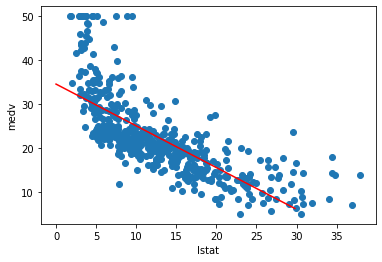

In [5]:
# Plotting the scatterplot of the best score feature and the corresponding regression line

import matplotlib.pyplot as plt

x_arr = np.arange(0, 30, 0.2)
y_arr = intercept + coef * x_arr
plt.plot(x_arr, y_arr, color="red")
plt.scatter(df[best_feature], df["medv"])
plt.xlabel(best_feature)
plt.ylabel('medv')
plt.show()

In [6]:
# Training a linear regression model using every feature as an input and outputting it's score 

features = [feature for feature in df.columns if feature != 'medv']
X1 = np.array(df[features])
regr = LinearRegression().fit(X1, y)
regr.score(X1, y)

0.7406426641094095